In [42]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from statsmodels.stats import diagnostic as diag

In [40]:
#Scripts were based on Python Machine Learning" Book by Sebastian Raschka and
# https://github.com/areed1192/sigma_coding_youtube/blob/master/python/python-data-science/machine-learning/multi-linear-regression/Machine%20Learning%20-%20Multi%20Linear%20Regression%20Analysis.ipynb

#Read data
df = pd.read_csv('RC_BAK.csv')

# get the summary
desc_df = df.describe()
# add the standard deviation metric
desc_df.loc['+2_std'] = desc_df.loc['mean'] + (desc_df.loc['std'] * 2)
desc_df.loc['-2_std'] = desc_df.loc['mean'] - (desc_df.loc['std'] * 2)
# display it
desc_df

Time           Lat           Lon           Dep           Mag
count   33661.000000  33661.000000  33661.000000  33661.000000  33661.000000
mean     2019.611627     35.765246   -117.575798      5.655352      1.214322
std         0.009622      0.126949      0.112751      2.930934      0.678667
min      2019.596100     35.469906   -117.840202      0.089000     -0.340000
25%      2019.603100     35.658142   -117.687305      3.342000      0.740000
50%      2019.611000     35.747233   -117.575301      4.980000      1.100000
75%      2019.619500     35.889779   -117.483138      7.755000      1.570000
max      2019.629900     36.027527   -117.213200     17.991000      7.100000
+2_std   2019.630872     36.019143   -117.350296     11.517219      2.571656
-2_std   2019.592382     35.511348   -117.801300     -0.206516     -0.143012

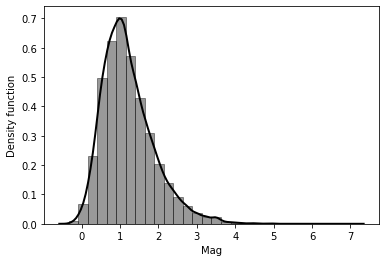

In [32]:
import seaborn as sns
sns.distplot(df['Mag'], hist=True, kde=True, 
             bins=int(30), color = 'black', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 2})
plt.ylabel('Density function')
plt.savefig("plot/DensityPlot_RC.png", dpi=500)

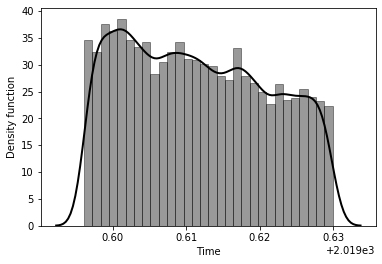

In [33]:
sns.distplot(df['Time'], hist=True, kde=True, 
             bins=int(30), color = 'black', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 2})
plt.ylabel('Density function')
#plt.xlim(2009,2020)
#plt.title('Kernal Density Estimation:(California events:2010-2018)')
plt.savefig("plot/Density_time_Plot_RC.png", dpi=500)

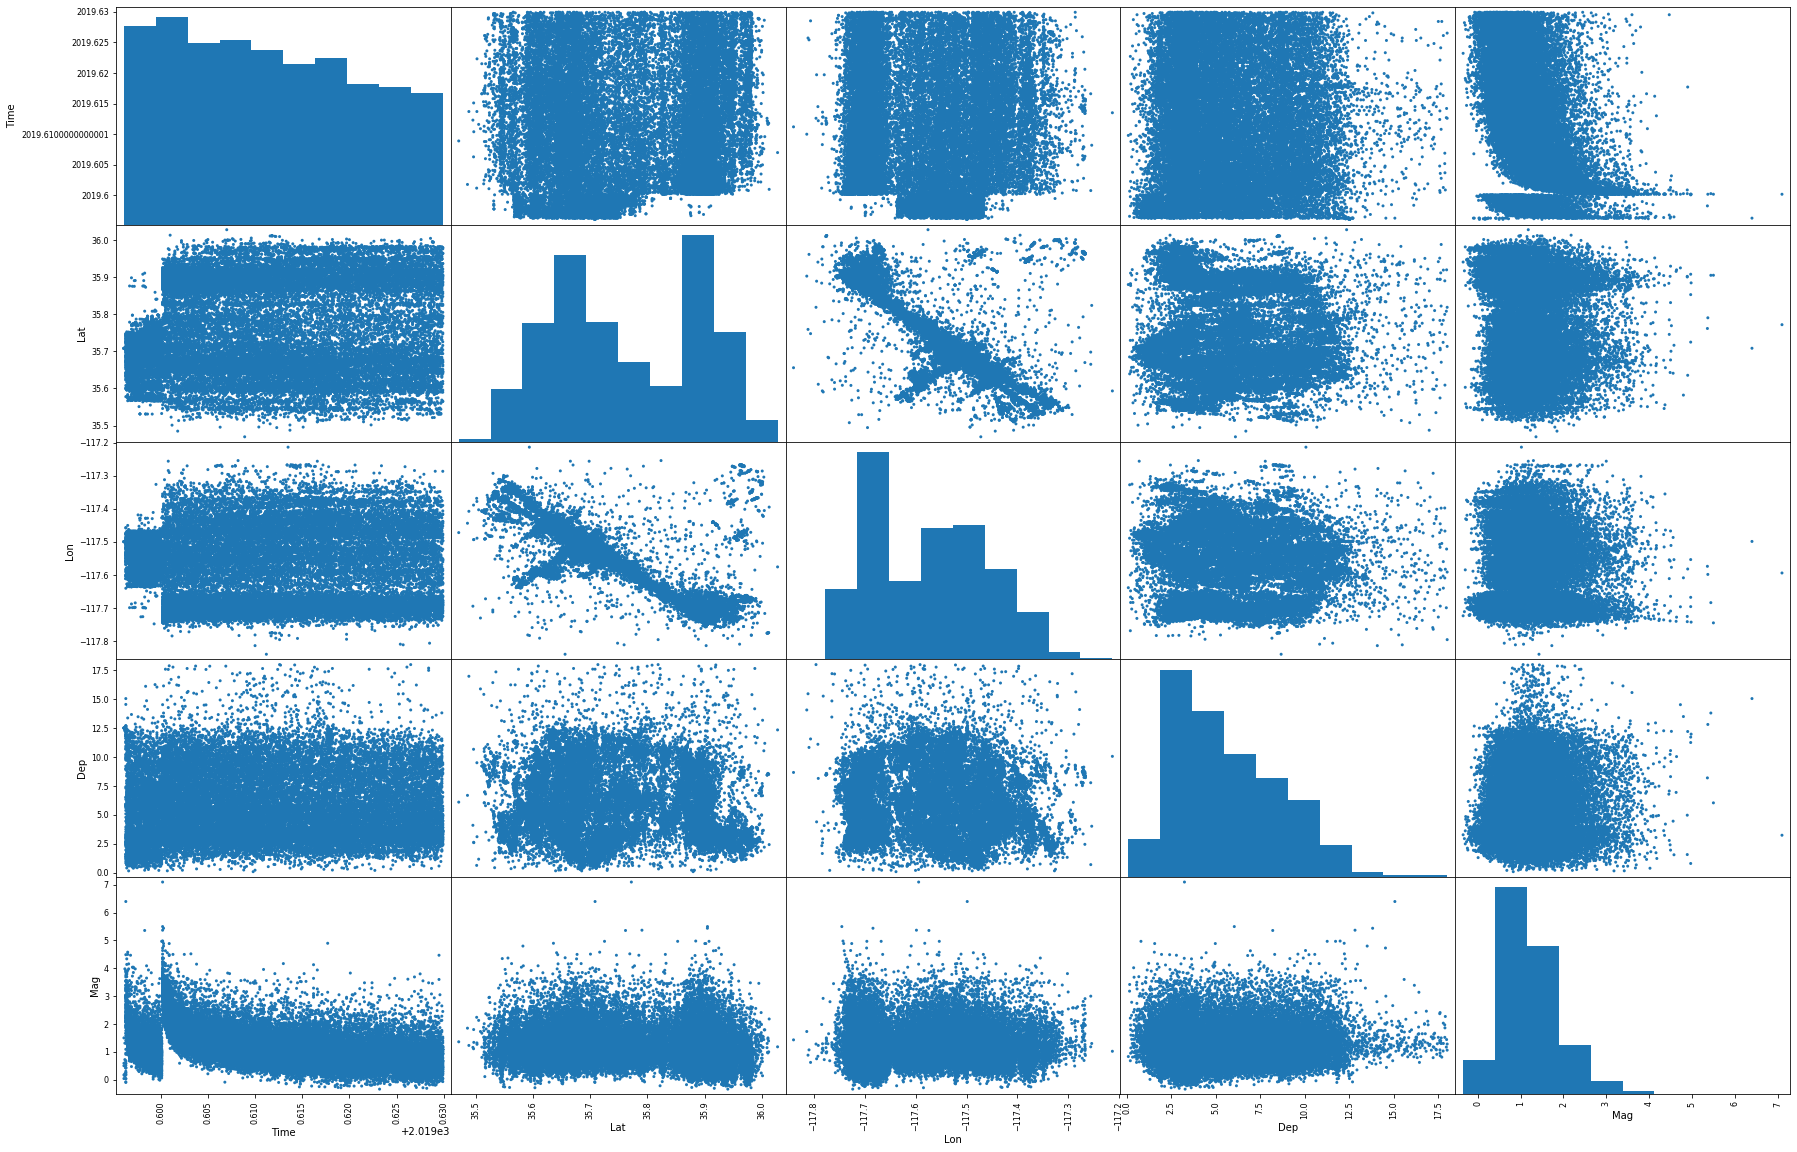

In [34]:
# define the plot
pd.plotting.scatter_matrix(df, alpha = 1, figsize = (30, 20))
plt.savefig("plot/GraphicalPlot_Cali.png", dpi=500)
# show the plot
plt.show()

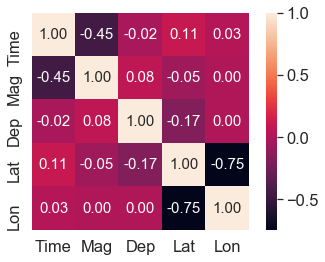

In [38]:
#Heat map
cols = ['Time', 'Mag', 'Dep', 'Lat', 'Lon']
cm = np.corrcoef(df[cols].values.T) 
sns.set(font_scale=1.5)
hm = sns.heatmap(cm,cbar=True,annot=True,square=True,fmt='.2f',annot_kws={'size': 15},yticklabels=cols,xticklabels=cols)
plt.show()

In [45]:
#Checking for heteroscedasticity
X = df.drop('Time', axis = 1)
Y = df[['Dep']]
# define our intput
X2 = sm.add_constant(X)

# create a OLS model
model = sm.OLS(Y, X2)

# fit the data
est = model.fit()


# Run the White's test
_, pval, __, f_pval = diag.het_white(est.resid, est.model.exog)
print(pval, f_pval)
print('-'*100)

# print the results of the test
if pval > 0.05:
    print("For the White's Test")
    print("The p-value was {:.4}".format(pval))
    print("There is no heterosecdasticity. \n")
    
else:
    print("For the White's Test")
    print("The p-value was {:.4}".format(pval))
    print("There is heterosecdasticity. \n")

# Run the Breusch-Pagan test
_, pval, __, f_pval = diag.het_breuschpagan(est.resid, est.model.exog)
print(pval, f_pval)
print('-'*100)

# print the results of the test
if pval > 0.05:
    print("For the Breusch-Pagan's Test")
    print("The p-value was {:.4}".format(pval))
    print("There is no heterosecdasticity.")

else:
    print("For the Breusch-Pagan's Test")
    print("The p-value was {:.4}".format(pval))
    print("There is heterosecdasticity.")

0.0 0.0
----------------------------------------------------------------------------------------------------
For the White's Test
The p-value was 0.0
There is heterosecdasticity. 

0.0 0.0
----------------------------------------------------------------------------------------------------
For the Breusch-Pagan's Test
The p-value was 0.0
There is heterosecdasticity.


In [24]:
#--------------------------Regresion Analysis---------------------------------
# define our input variable (X) & output variable
X = df.drop('Time', axis = 1)
Y = df[['Time']]

# Split X and y into  training and testing portion
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=1)
# create a Linear Regression model object
regression_model = LinearRegression()
# pass through the X_train & y_train data set
regression_model.fit(X_train, y_train)
y_predict = regression_model.predict(X_test)

# grab the coefficient of our model and the intercept
intercept = regression_model.intercept_[0]
coefficent = regression_model.coef_[0][0]

print("The intercept for our model is {:.4}".format(intercept))
print('-'*100)

# loop through the dictionary and print the data
for coef in zip(X.columns, regression_model.coef_[0]):
    print("The Coefficient for {} is {:.2}".format(coef[0],coef[1]))

The intercept for our model is 9.77e-15
----------------------------------------------------------------------------------------------------
The Coefficient for Mag is -1.7e-16
The Coefficient for Lat is -6.1e-16
The Coefficient for Lon is -9.7e-17
The Coefficient for Dep is 1.0


The number of lags will be 10
----------------------------------------------------------------------------------------------------


C:\Users\Kiran Pandey\.conda\envs\Python_Geo\lib\site-packages\statsmodels\stats\diagnostic.py:524: FutureWarning: The value returned will change to a single DataFrame after 0.12 is released.  Set return_df to True to use to return a DataFrame now.  Set return_df to False to silence this warning.
  warnings.warn(msg, FutureWarning)


The lowest p-value found was 0.0
So there is autocorrelation.
----------------------------------------------------------------------------------------------------


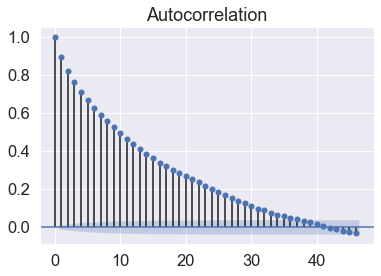

In [46]:
# test for autocorrelation
from statsmodels.stats.stattools import durbin_watson
# calculate the lag, optional
lag = min(10, (len(X)//5))
print('The number of lags will be {}'.format(lag))
print('-'*100)
# run the Ljung-Box test for no autocorrelation of residuals
# test_results = diag.acorr_breusch_godfrey(est, nlags = lag, store = True)
test_results = diag.acorr_ljungbox(est.resid, lags = lag)

# grab the p-values and the test statistics
ibvalue, p_val = test_results

# print the results of the test
if min(p_val) > 0.05:
    print("The lowest p-value found was {:.4}".format(min(p_val)))
    print("So there is no autocorrelation.")
    print('-'*100)
else:
    print("The lowest p-value found was {:.4}".format(min(p_val)))
    print("So there is autocorrelation.")
    print('-'*100)

# plot autocorrelation
sm.graphics.tsa.plot_acf(est.resid)
plt.show()